<a href="https://colab.research.google.com/github/sds-capstone/2022-09-proj7-women-at-table/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Access to Emergency Funds in Subsaharan Countries

Data Source: [Global Findex Database 2017](https://microdata.worldbank.org/index.php/catalog/3324)

(filtered to only Subsaharan countries (35))

## Introduction

Data sets and algorithms have real world impacts on real people. The inherent bias in data sets can carry over into machine learning algorithms that are used to profile and catagorize people. Since datasets arent collected in a vaccum and often represent the discriminatory environments in which they are collected, we must find ways to make data sets and statistcal methods more equitable. In this workshop will explore fairness methods that can be implemented into machine learning models to fight the despotic presence of prejudiced systems and attitudes that seep their way into data. 

When using, collecting, or distributnig datasets there are certain questions that we must answer to make sure we are using the data set responsibly. We want to make sure that we know basic information about the data set so we can determine how it can be used. There is a certain amount of investigating and critical thinking before we start collecting or analyzing 

## Part A: Background Questions

* WHY was the dataset created?

The Global Findex Database is one of the most comprehensive data sets on how adults save, borrow, make payments, and manage risk in more than 140 economies around the world. It was initially created in 2011 in order to measure financial inclusion and promote improvements in the same. It has been updated in 2014 and 2017. [Source](https://microdata.worldbank.org/index.php/collections/global-findex)

* WHAT was the purpose the dataset was created for? 

The main purpose the data set was created for was to record various measures of financial equity and inclusion such that the information can reveal opportunities to expand access to financial services and to promote greater use of digital financial services for folks who do not have a bank account.
[Source](https://microdata.worldbank.org/index.php/collections/global-findex) 

 * Are there tasks for which the dataset should not be used?

The documentation does not explicitly state tasks that the data should not be used for. One use I can think of that could be harmful is if credit card companies or other companies deciding whether or not to give folks loans used it to build a model to predict whether or not an individual would pay back a loan. This could be harmful because it could reinforce discrimination against poor people.

* WHO created the dataset (e.g., which team, research group) and on behalf of which entity (e.g., company, institution, organization). Who funded the creation of the dataset? 

The data set was created by the Development Research Group, Finance and Private Sector Development Unit of [The World Bank](https://www.worldbank.org/en/publication/globalfindex) with funding from Bill & Melinda Gates Foundation. The survey was conducted by Gallup, Inc in association with the annual Gallup World Poll.

 * HOW can the owner/curator/manager of the dataset be contacted (e.g., email address)?

 I am not able to find an email address listed in the documentation or anywhere on the study website.

* Were the individuals in question notified about the data collection? Did the individuals in question consent to the collection and use of their data?

The participants responded to the questionnaire either on the phone or in-person, so it seems implied that they consented to data collection. It is unclear from the documentation whether or not the participants fully understood and consented to the publication and use of their data, although I imagine they may have signed a consent form before the interview.

## Additional Questions
      
* Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set? 

This dataset contains data on global access to financial services from payments to savings and borrowing. This dataset only contains data from 35 countries in the SubSaharan African region and it is a sample of a larger dataset that contains information from a larger geographic area. The complete dataset has data from about 140 countries. 

 * If the dataset is a sample, then what is the larger set? Is the sample 
representative of the larger set (e.g., geographic coverage)?

I believe the sample is not representative of the complete dataset since each country from the sample has different economies. There is no feasible way for data on one country’s economy to be representative of another country’s due to the fact that their economies are most likely structured differently and their populations are different. However, because we are not looking to analyze the data from all countries and are only looking at countries in the Subsaharan African region, we do not need the smaller dataset we are working with to be representative of the larger one. 

   * If so, please describe how this representativeness was validated/verified. 
 * If it is not representative of the larger set, please describe why not (e.g., to cover a more diverse range of instances, because instances were withheld or unavailable).

* What (other) tasks could the dataset be used for? 

We could always filter the larger dataset by region or other variables in order to gain insight into the financial behaviors for different regions. We also are currently only focusing on some of the variables from the dataset, and if we used more of the variables we could then gain a better understanding of the dataset. 

## Part B: Exploratory Data Analysis

### Questions

* Does the dataset identify any subpopulations (e.g., by age, gender)?

Yes, the data set can be separated by gender and country.
 * If so, please describe how these subpopulations are identified and provide a description of their respective distributions within the dataset. 


The variable female distingishes gender. 1 represents male, 2 represents female. There are 16716 males in this datset and 17388 females. This is a fairly equal distribution that we can see visualy in later plots.

The economy variable separates respondants by what country they live in. There are 35 different countries with around 1000 respondants from each.  

* Is it possible to identify individuals (i.e., one or more natural persons), either directly or indirectly (i.e., in combination with other data) from the dataset?

No, there is information about age, gender and finances, but none of these variables in combination with the others could lead to identification of individuals. 


  * If so, please describe how. 
* Are there any errors, sources of noise, or redundancies in the dataset? 

The data set consists of mostly discrete variables, this means that there isnt going to be any outstanding data points for any individual variable. Once we make our model we can decide of there are any variables distracting and contorting the results but all the variables seem related to access to emergency funds. However it would be good to investigate whether or not there are any variables that have an unusual amount or "dk" or "ref" responses. 


* Is any information missing from individual instances?
   * If so, please provide a description, explaining why this information is missing (e.g., because it was unavailable).

   Some questions are conditional on the answers to other questions. For example fin4 represents the question "if has debit card, used in the past 12 months". This question can only be answered if the respondant has a debit card. Most of the missing values in the data set are due to this. respondants also have the option to refuse to answer or respond with "dont know" these are technically responses but also missing data.

* Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?

Yes, we add clear labels, titles, and legends. The data is represented as is, we didn't do any transforming or projecting. 

Now that we've researched out data and we are sure we arent misusing it, we can begin with our exploratory data analysis.

### Imports and Data Cleaning

In [ ]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [ ]:
# read in data
file = 'https://raw.githubusercontent.com/sds-capstone/2022-09-proj7-women-at-table/main/findex_SubSahAfrica.csv'
df = pd.read_csv(file, index_col=0)
print(f'There are {df.shape[0]} entries and {df.shape[1]} features')
df.head()

There are 35000 entries and 105 features


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
12138,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143101339,1.909609,1,60.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
12139,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,123998301,2.075761,1,45.0,1.0,1,...,4,4,4,4.0,3,1.0,0.0,NaN,0.0,NaN
12140,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,157155643,0.785666,1,27.0,3.0,4,...,4,4,4,4.0,4,2.0,1.0,1.0,0.0,0.0
12141,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,155618899,1.450568,2,24.0,1.0,2,...,4,4,4,4.0,3,5.0,0.0,NaN,0.0,NaN
12142,Benin,BEN,Sub-Saharan Africa (excluding high income),6211794.0,143861320,0.461588,1,22.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN


In [ ]:
# set gender palette
red = '#FF7377'
blue = '#00B2EE'
gender_palette = [blue, red]

purple = '#BF3EFF'
green = '#1B851B'
yes_no_pal = [purple, green]

pink = '#FFC0CB'

In [ ]:
#@title
%%capture --no-display
# select vars of interest
df2 = df[['female', 'age', 'emp_in', 'account_fin', 'fin24', 'fin25', 'fin32', 'fin48', 'educ', 'economy']]
df2 = df2.query('fin24 < 3')
# Recode fin24 values
df2.loc[df2['fin24'] == 1, "fin24"] = 'Yes'
df2.loc[df2['fin24'] == 2, "fin24"] = 'No'
df2.loc[df2['fin24'] == 3, "fin24"] = 'Don\'t Know'
df2.loc[df2['fin24'] == 4, "fin24"] = 'Refuse'
# rename fin24 to has_access
df2.rename(columns = {'fin24': 'has_access'}, inplace = True)
# recode gender
df2.loc[df2['female'] == 1, "female"] = 'male'
df2.loc[df2['female'] == 2, "female"] = 'female'
df2.rename(columns = {'female': 'gender'}, inplace = True)
# recode account_fin
df2.loc[df2['account_fin'] == 0, "account_fin"] = 'No'
df2.loc[df2['account_fin'] == 1, "account_fin"] = 'Yes'
# recode emp_in
df2.loc[df2['emp_in'] == 0, "emp_in"] = 'No'
df2.loc[df2['emp_in'] == 1, "emp_in"] = 'Yes'
# Recode fin32 values: Recieved Wage Payments
df2.loc[df2['fin32'] == 1, "fin32"] = 'Yes'
df2.loc[df2['fin32'] == 2, "fin32"] = 'No'
df2.loc[df2['fin32'] == 3, "fin32"] = 'Don\'t Know'
df2.loc[df2['fin32'] == 4, "fin32"] = 'Refuse'
# recode fin48 values: National ID
df2.loc[df2['fin48'] == 1, "fin48"] = 'Yes'
df2.loc[df2['fin48'] == 2, "fin48"] = 'No'
df2.loc[df2['fin48'] == 3, "fin48"] = 'Don\'t Know'
df2.loc[df2['fin48'] == 4, "fin48"] = 'Refuse'
#recode educ values: Highest Level of Education
df2.loc[df2['educ'] == 1, "educ"] = 'Primary'
df2.loc[df2['educ'] == 2, "educ"] = 'Secondary'
df2.loc[df2['educ'] == 3, "educ"] = 'Tertiary'
df2.loc[df2['educ'] == 4, "educ"] = 'Don\'t Know'
df2.loc[df2['educ'] == 5, "educ"] = 'Refuse'
#recode fin25 values: Main Source of Emergency Funds
df2.loc[df2['fin25'] == 1, "fin25"] = 'Savings'
df2.loc[df2['fin25'] == 2, "fin25"] = 'Family, relatives, or friends'
df2.loc[df2['fin25'] == 3, "fin25"] = 'Money from working'
df2.loc[df2['fin25'] == 4, "fin25"] = 'Borrowing from a bank/employer/private lender'
df2.loc[df2['fin25'] == 5, "fin25"] = 'Selling assets'
df2.loc[df2['fin25'] == 6, "fin25"] = '(Some other source)'
df2.loc[df2['fin25'] == 7, "fin25"] = 'Don\'t Know'
df2.loc[df2['fin25'] == 8, "fin25"] = 'Refuse'
#recode fin32 values: Recieved Wage Payments
df2.loc[df2['fin32'] == 1, "fin32"] = 'Yes'
df2.loc[df2['fin32'] == 2, "fin32"] = 'No'
df2.loc[df2['fin32'] == 3, "fin32"] = 'Don\'t Know'
df2.loc[df2['fin32'] == 4, "fin32"] = 'Refuse'

df2.rename(columns = {'fin32': 'Recieve Wage Payments', 'fin48': 'National ID', 'educ': 'Education', 'fin25': 'main_source_funds', 'fin32': 'Recieve Wage Payments'}, inplace = True)
df2.head()

,gender,age,emp_in,account_fin,has_access,main_source_funds,Recieve Wage Payments,National ID,Education,economy
12138,male,60.0,No,No,No,NaN,No,No,Primary,Benin
12139,male,45.0,Yes,Yes,Yes,Money from working,No,Yes,Primary,Benin
12140,male,27.0,Yes,No,Yes,Money from working,No,Yes,Tertiary,Benin
12141,female,24.0,Yes,No,Yes,"Family, relatives, or friends",No,No,Primary,Benin
12142,male,22.0,Yes,No,No,NaN,No,No,Primary,Benin


### Demographics

The barplot below displays the gender distribution of our sample. We can see that the number of males versus females is almost evenly split.

[Text(0.5, 1.0, 'Gender Distribution')]

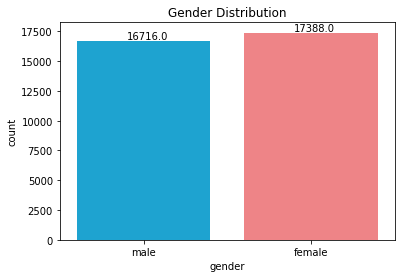

In [ ]:
# barplot female versus not
g = sns.countplot(x = 'gender', data = df2, palette = gender_palette)

for p in g.patches:
   g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ .3, p.get_height()+100))

g.set(title = "Gender Distribution")

The barplot below shows us that there are more women with primary education, but more men with secondary or tertiary education. Overall we can see that there are more men with higher education than women. About 1,000 more men have received a secondary education and there is about double the amount of men with tertiary education compared to women. 

[Text(0.5, 1.0, 'Education Count by Gender')]

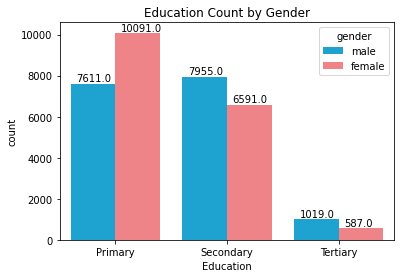

In [ ]:

ebg = sns.countplot(x="Education", hue= "gender", palette= gender_palette, order= ['Primary', 'Secondary', 'Tertiary'], data= df2)
for p in ebg.patches:
   ebg.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.05, p.get_height()+100))

ebg.set(title= "Education Count by Gender")


In the plot below, each bar represents a five-year age range. The first bar measures those aged 15-19, then 20-24, 25-29, and so on, until we reach the last bar that goes from 90-95. Overall we can see that people aged 20-35 have the most access to emergency funds.  

Text(0.5, 0.98, 'Access to Emergency Funds by Age')

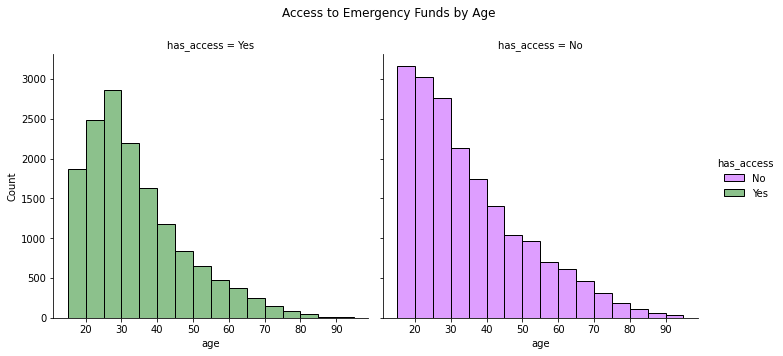

In [ ]:
age2 = sns.displot(x= "age", col= "has_access", hue="has_access", bins = [15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95], col_order= ["Yes", "No"], hue_order= ['No', 'Yes'],palette= yes_no_pal, data=df2)

age2.fig.subplots_adjust(top=.85)
age2.fig.suptitle('Access to Emergency Funds by Age')


### Financial 

**Correlation Plot**
To get a better idea of which financial variabbles are important, lets create a correlation plot with all of the financial variables that arent conditionals of other questions. Are there any correlations that seem strong?

In [ ]:
#@title
# data set with all the financial variables except for the conditionals
df_fin = df[['inc_q','fin2','fin3','fin4','fin5','fin6','fin7','fin8','fin9','fin10',
             'fin14a','fin14b','fin14c','fin15','fin16',
             'fin17a','fin17b','fin19','fin20','fin21','fin22a','fin22b','fin22b','fin24',
             'fin25','fin26','fin28','fin30','fin32','fin37','fin38',
             'fin42','fin46','account','saved','borrowed','receive_wages','receive_pension',
             'pay_utilities','remittances','pay_onlne','pay_onlne_mobintbuy','pay_cash',
             'pay_cash_mobintbuy']]

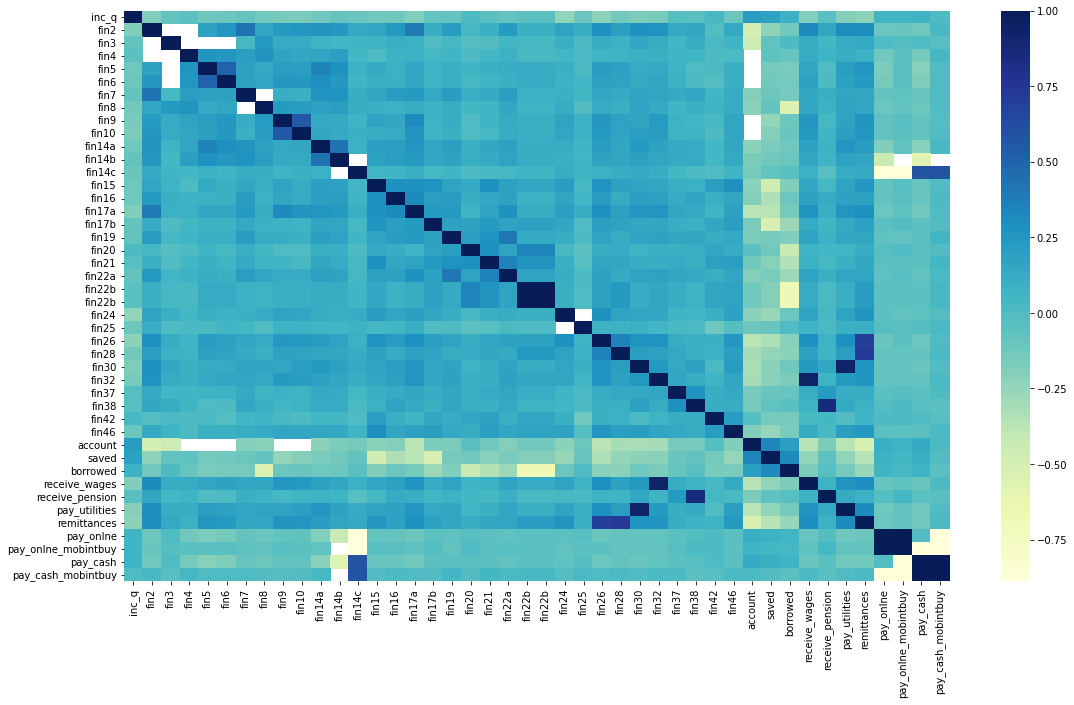

In [ ]:
#@title
fig, ax = plt.subplots()

corr = df_fin.corr()
sns.heatmap(corr, cmap="YlGnBu", xticklabels = True, yticklabels = True)
fig.set_size_inches(18.5, 10.5)

We assumed that the has debit card variable(fin2) and income quantile(inc_q) would have the largest correlation with access to emergency funds(fin24) however, income quantile doesnt seem to correlate with access to emergency funds. The access to debit card variable seems to have a slight correlation.Overall access to emergency funds doesnt look like it has a strong correlation with the other financial variables, possibly remmittances. There seem to be a few stronger correlations however these are mostly from two questions being very similar. For example fin32 seems correlated with the receive wages variable. fin32 is asking if the participant reveived wages in the past 12 months. This correlation plot is misleading in that way. 

Now, let's dive deeper into a few specific financial variables that we think will have an impact on access to emergency funds. 

The barplot below displays the distribution of how many individuals in our sample have a financial account versus do not have a financial account. We can see that about two thirds of individuals do not have an account. This is likely connected to the lack of access to emergency funds displayed above given that if an individual does not have a financial account, we would expect they are less likely to have a source of emergency funds, as emergency funds are generally stored in an account.  

[Text(0.5, 0, 'Has a financial account?'),
 Text(0.5, 1.0, 'Distribution of Has a Financial Account')]

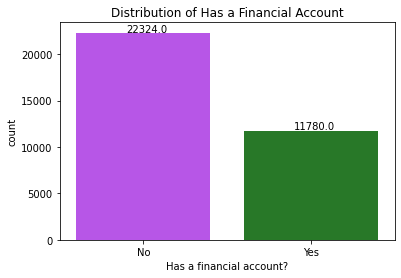

In [ ]:
# barplot of number of people who have a bank account
g = sns.countplot(x = 'account_fin', data = df2, palette = yes_no_pal)
for p in g.patches:
   g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ .3, p.get_height()+100))
g.set(title = "Distribution of Has a Financial Account", xlabel = 'Has a financial account?')

In [ ]:
%%capture --no-display
# reasons for no financial account
# pivot data to long format
df_long = df[['fin11a', "fin11b", "fin11c", "fin11d", "fin11e", "fin11f", "fin11g", "fin11h"]]\
.stack()\
.reset_index()
df_long.rename(columns = {'level_1':'reason', 0:'value'}, inplace = True)
df3 = df_long.query('value == 1.0') # filter to only "yes" answers for each reason
# recode reason values
df3.loc[df3['reason'] == 'fin11a', "reason"] = 'distance'
df3.loc[df3['reason'] == 'fin11b', "reason"] = 'expense'
df3.loc[df3['reason'] == 'fin11c', "reason"] = 'no_documentation'
df3.loc[df3['reason'] == 'fin11d', "reason"] = 'lack_trust'
df3.loc[df3['reason'] == 'fin11e', "reason"] = 'religious'
df3.loc[df3['reason'] == 'fin11f', "reason"] = 'lack_money'
df3.loc[df3['reason'] == 'fin11g', "reason"] = 'family_member_has'
df3.loc[df3['reason'] == 'fin11h', "reason"] = 'no_need'
df3.head()

# aggregate counts by reason
reason_counts = df3.groupby('reason').agg('count').reset_index()

The bar plot below displays the distribution of reasons for not having a financial account for those who answered "No" to the question of whether or not they have a financial account. We can see that the top reason by far is that folks simply do not have money to keep in an account, and the second to top reason is the expense of of the account itself. This points to the idea that a large percentage of the folks sampled are very poor, and thus have neither a financial account nor emergency funds.

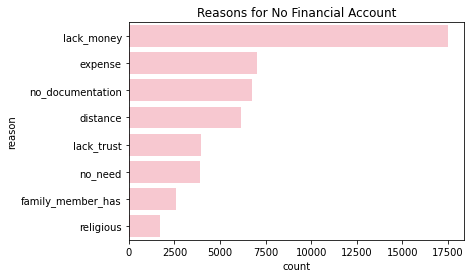

In [ ]:
# barplot of count by reason-- seaborn
reasons_plot = sns.barplot(y = 'reason',
                           x = 'value', 
                           data = reason_counts, 
                           palette = [pink, pink, pink, pink, pink, pink, pink, pink],
                      order = ["lack_money","expense",
                               "no_documentation", "distance",
                               "lack_trust", "no_need",
                               "family_member_has", "religious"]).set(
                      title = "Reasons for No Financial Account",
                      xlabel = "count")

The bar chart below displays the relationship between gender and whether or not an individual has a financial account. We can see that males are more likely to have a financial account than females. Thus further reinforces the idea that there is gender inequity with regard to financial status.

[Text(0.5, 0, 'Has a financial account?'),
 Text(0.5, 1.0, 'Distribution of Has a Financial Account by Gender')]

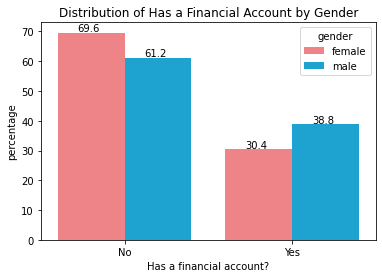

In [ ]:
gender_acc_counts = (df2.groupby(['gender'])['account_fin']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     )

g = sns.barplot(x = "account_fin", y = "percentage", hue="gender", data = gender_acc_counts, palette = [red, blue])
for p in g.patches:
   g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.12, p.get_height()+.5))
g.set(title = "Distribution of Has a Financial Account by Gender", xlabel = 'Has a financial account?')

Next, we explore the distribution of employment status. It appears that about three-fourths of individuals are in the workforce, which is much higher than the percentage of individuals who have access to emergency funds. This may indicate that many people who have jobs do not get paid enough to have emergency funds in savings.

[Text(0.5, 0, 'In workforce?'),
 Text(0.5, 1.0, 'Distribution of Whether or not in Workforce')]

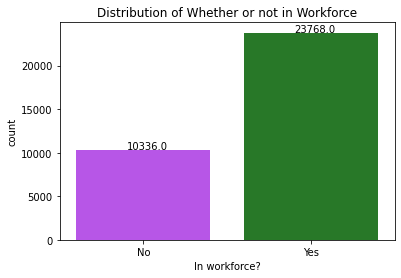

In [ ]:
# Distribution by in workforce
g = sns.countplot(x = 'emp_in', data = df2, palette = yes_no_pal)
for p in g.patches:
   g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ .3, p.get_height()+100))
g.set(title = "Distribution of Whether or not in Workforce", xlabel = "In workforce?")

The bar plot below displays the relationship between gender and employment status. It is clear that more females than males are unemployed. This may be one factor contributing to the gender inequity with regard to financial status displayed in the above plots.

[Text(0.5, 0, 'In workforce?'),
 Text(0.5, 1.0, 'Distribution of In Workforce by Gender')]

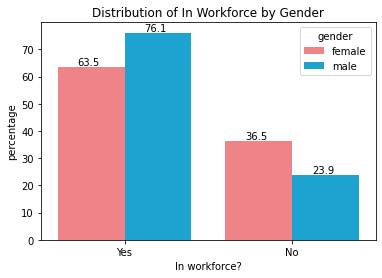

In [ ]:
# Distribution by Gender and In Workforce
gender_emp_counts = (df2.groupby(['gender'])['emp_in']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
)

g = sns.barplot(x = "emp_in", y = "percentage", hue="gender", data = gender_emp_counts, palette = [red, blue])
for p in g.patches:
   g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.12, p.get_height()+.5))
g.set(title = "Distribution of In Workforce by Gender", xlabel = "In workforce?")

Lets now move on to looking at the income quantile variable. How is it distributed, what is the mean value, and how does it relate to access to emergency funds?

In [ ]:

df["inc_q"].mean()

3.241085714285714

Although income quantile is a categorical variable, it could still be helpful to look at the mean value because the categories represent meaningful numbers. Income quantile is separated into 5 quantiles with 1 being the poorest and 5 being the richest. The mean for all the sub sahara countries is 3.241. This means that all the countries average out to be about middle class. We will look at some individual countries later on. 

In [ ]:
#@title
# cant remember if i used all of these, i will check back later
df_inq = df['inc_q']
df_inq_fin24 = df[['inc_q','fin24']]
df_inq_fin24_wp = df[['inc_q','fin24', 'wpid_random']]
#df_inq_fin24_wp.query('fin24 ==1 and fin24 ==2')
df_inq_fem = df[['inc_q','female']]


df_inq_24wp = df_inq_fin24_wp[(df_inq_fin24_wp['fin24']<=2)]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 0.98, 'Income Quantiles')

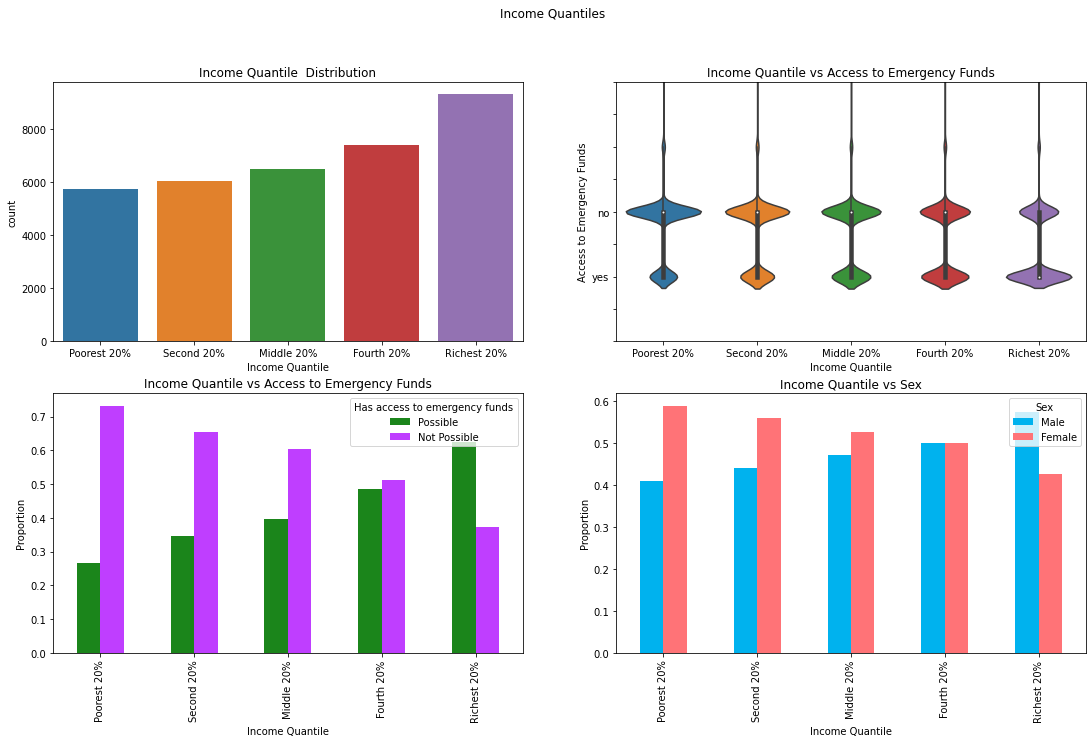

In [ ]:
#@title
#stacking plots
# create new figure
fig = plt.figure()
#add sub plot
ax1 = fig.add_subplot(2,2,1) 
#hand off to pandas
sns.countplot(df_inq, ax = ax1)
ax1.set_xlabel("Income Quantile")
ax1.set_xticklabels(['Poorest 20%','Second 20%','Middle 20%','Fourth 20%','Richest 20%'])
ax1.title.set_text('Income Quantile  Distribution')

# second graph
ax2 = fig.add_subplot(2,2,2)
sns.violinplot(data = df, x='inc_q', y='fin24', ax = ax2)
ax2.set_xlabel("Income Quantile")
ax2.set_ylabel("Access to Emergency Funds")
ax2.title.set_text('Income Quantile vs Access to Emergency Funds')
ax2.set_xticklabels(['Poorest 20%','Second 20%','Middle 20%','Fourth 20%','Richest 20%'])
ax2.set_yticklabels(['','','yes','','no','','','',''])
ax2.set(ylim=(0, 4))




## third graph
# set up proportions

# count each group
counts_df = df_inq_24wp.groupby(["fin24","inc_q"])['wpid_random'].count().unstack()
# calculate percents
inc_q_percents_df = counts_df.div(counts_df.sum()).T

ax3 = fig.add_subplot(2,2,3)

inc_q_percents_df.plot(kind = "bar", stacked = False, color = ['#1B851B','#BF3EFF'], ax = ax3)
ax3.legend(["Possible","Not Possible"],
           title = "Has access to emergency funds")

ax3.set_ylabel("Proportion")
ax3.set_xlabel("Income Quantile")
#ax3.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax3.set_xticklabels(['Poorest 20%','Second 20%','Middle 20%','Fourth 20%','Richest 20%'])
ax3.title.set_text('Income Quantile vs Access to Emergency Funds')


## Fourth graph

# count each group
fem_counts_df = df.groupby(["female","inc_q"])['wpid_random'].count().unstack()
# calculate percents
fem_percents_df = fem_counts_df.div(fem_counts_df.sum()).T


ax4 = fig.add_subplot(2,2,4)

fem_percents_df.plot(kind = "bar", stacked = False, color = ['#00B2EE','#FF7377'], ax = ax4)
ax4.legend(["Male","Female"],
           title = "Sex")

ax4.set_ylabel("Proportion")
ax4.set_xlabel("Income Quantile")
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 90)
ax4.set_xticklabels(['Poorest 20%','Second 20%','Middle 20%','Fourth 20%','Richest 20%'])
ax4.title.set_text('Income Quantile vs Sex')



fig.set_size_inches(18.5, 10.5)
fig.suptitle("Income Quantiles")

Income quantile 5, the richest 20%, has the highest count of people. Males comprise the majority of this quantile. Women compose the majority of the poorest 20%,second poorest 20%, and middle 20%, which are the poorest quantiles. The majority of people in the richest 20% have more access to emergency funds while the majority of people in the lowest 20% dont have access to emergency funds.

Now lets look at the access to debit card variable(fin2). This is another categorical variable. The levels are encoded. 1: yes, 2:no, 3: dont know, 4: refused to answer. 

In [ ]:
#@title
df_fin2 = df[["fin2"]]
df_fin2_fin24_wpid = df[["fin2","fin24","wpid_random"]]
df224w = df_fin2_fin24_wpid[(df_fin2_fin24_wpid['fin2']<=2)& (df_fin2_fin24_wpid['fin24']<=2)]


df_fem_fin24_wpid = df[["female","fin2","wpid_random"]]
dffem24w = df_fem_fin24_wpid[(df_fem_fin24_wpid['fin2']<=2)]


Text(0.5, 0.98, 'Access to Debit Card')

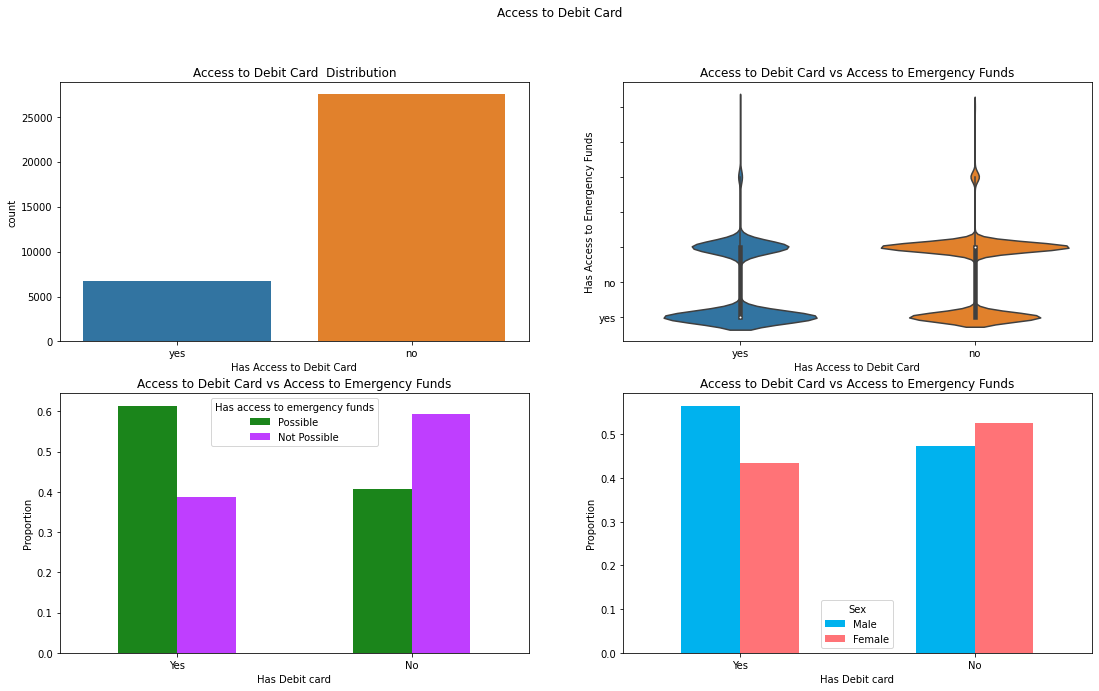

In [ ]:
#@title
#stacking plots
# create new figure
fig = plt.figure()
#add sub plot
ax1 = fig.add_subplot(2,2,1) 
#hand off to pandas
sns.countplot(data = df_fin2,x = 'fin2', order= [1,2],ax = ax1)
ax1.title.set_text('Access to Debit Card  Distribution')
ax1.set_xticklabels(["yes","no","dont know","refused to answer"])
ax1.set_xlabel("Has Access to Debit Card")


ax2 = fig.add_subplot(2,2,2)
sns.violinplot(data = df, x='fin2', y='fin24',order= [1,2], ax = ax2)
ax2.set_xlabel("Has Access to Debit Card")
ax2.set_ylabel("Has Access to Emergency Funds")
ax2.title.set_text('Access to Debit Card vs Access to Emergency Funds')
ax2.set_yticklabels(['','yes','no','','','',''])
ax2.set_xticklabels(["yes","no","dont know","refused to answer"])


# third graph
# set up proportions

# count each group
counts_fin2_df = df224w.groupby(["fin24","fin2"])['wpid_random'].count().unstack()
#calculate percents
fin2_percents_df = counts_fin2_df.div(counts_fin2_df.sum()).T

ax3 = fig.add_subplot(2,2,3)
fin2_percents_df.plot(kind = "bar", stacked = False, color = ['#1B851B','#BF3EFF'],ax = ax3)
ax3.legend(["Possible","Not Possible"],title = "Has access to emergency funds")
ax3.set_xticklabels(["Yes", "No"], rotation=0)
ax3.set_ylabel("Proportion")
ax3.set_xlabel("Has Debit card")
ax3.title.set_text('Access to Debit Card vs Access to Emergency Funds')



# fourth graph

# set up proportions

# count each group
fem_counts_fin2_df = dffem24w.groupby(["female","fin2"])['wpid_random'].count().unstack()
#calculate percents
fem_fin2_percents_df = fem_counts_fin2_df.div(fem_counts_fin2_df.sum()).T



ax4 = fig.add_subplot(2,2,4)
fem_fin2_percents_df.plot(kind = "bar", stacked = False, color = ['#00B2EE','#FF7377'],ax = ax4)
ax4.legend(["Male","Female"],title = "Sex")
ax4.set_xticklabels(["Yes", "No"], rotation=0)
ax4.set_ylabel("Proportion")
ax4.set_xlabel("Has Debit card")
ax4.title.set_text('Access to Debit Card vs Access to Emergency Funds')




fig.set_size_inches(18.5, 10.5)
fig.suptitle("Access to Debit Card")

Looking at the counts of people with and without a debit card, it seems most people dont have access to a debit card. The counts of people who do and dont have access to debit cards seem to be evenly distributed between men and women. Relating to our outcome variable, people who dont have access to a debit card mostly dont have access to emergency funds. People who do have access to a debit card mostly have access to emergency funds.

While some people in lower income quantiles do have access to emergency funds, only the richest and second richest quantiles have more people that have access to emergency funds than people who dont. 

Comparing income quantiles and access to emergency funds we can see that people in higher quantiles have more access to emergency funds than people in lower income quantiles.

More than half the people who own debit cards have access to emergency funds while less than half of people who dont own credit cards, dont know, or refused to answer, have access to emergency funds. 


Does the country have an impact on income quantile, access to debit card, and access to emergency funds. What countries have the richest population on average?

In [ ]:
#@title
df_econ = df[["economy","inc_q","fin2","fin24"]]

Looking at the descriptive statistics for the countries, we can see that Gabon has the highest mean income quantile(3.362) and  South Sudan has the lowest(3.061). Lets look at their distributions.

In [ ]:
#@title
df_econ_gabon = df_econ[(df_econ.economy == "Gabon")]
df_econ_ss = df_econ[(df_econ.economy == "South Sudan")]

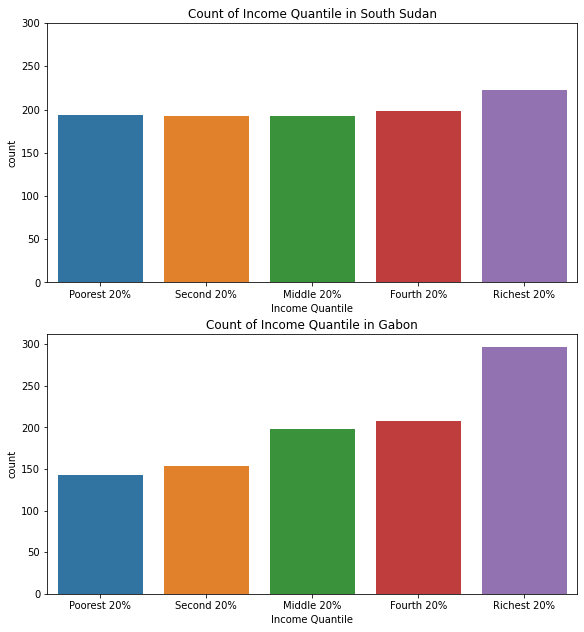

In [ ]:
#@title
#stacking plots
# create new figure
fig = plt.figure()
#add sub plot
ax1 = fig.add_subplot(2,1,1)


sns.countplot(data = df_econ_ss, x = "inc_q", ax = ax1)
ax1.set_xlabel("Income Quantile")
ax1.title.set_text("Count of Income Quantile in South Sudan")
ax1.set_xticklabels(['Poorest 20%','Second 20%','Middle 20%','Fourth 20%','Richest 20%'])
ax1.set_ylim(0, 300)


ax2 = fig.add_subplot(2,1,2)
sns.countplot(data = df_econ_gabon, x = "inc_q", ax = ax2)
ax2.set_xlabel("Income Quantile")
ax2.title.set_text("Count of Income Quantile in Gabon")
ax2.set_xticklabels(['Poorest 20%','Second 20%','Middle 20%','Fourth 20%','Richest 20%'])


fig.set_size_inches(9.5, 10.5)

Both the distributions follow the overall distribution for all of the 
countries combined. They are both left skewed. The distribution in Gabon is far more left skewed than the distribution of South Sudan. South Sudan has a pretty equal distribution for all of the income quantiles. 

Since these distributions are left skewed, the mean income for both of these countries is going to be pulled up by the larger number of people in the richer quantiles. We need to watch out for skewness when we are creating statistical models because the data at the tail end of the distribution can distort our results by acting as outliers. 

### Access to Emergency Funds

In this analysis, we create a model that will predict whether or not an individual within the Sub-Saharan region will have access to emergency funds based on the other variables available in the dataset including demographic variables such as gender, education level, age, and country of residence, as well as financial variables such as employment status and whether or not an individual has a financial account. So, we will now explore the relationships between each of several potential predictors and access to emergency funds.

[Text(0.5, 1.0, 'Distribution of Access to Emergency Funds')]

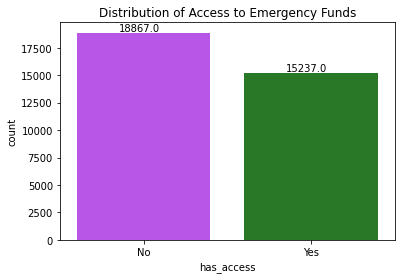

In [ ]:
# barplot of access to emergency funds
g = sns.countplot(x = 'has_access', data = df2, palette = yes_no_pal)
for p in g.patches:
   g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ .25, p.get_height()+100))
g.set(title = "Distribution of Access to Emergency Funds")

The barchart above displays the overall distribution of access to emergency funds. We can see that over half of individuals represented in the data do not have access. This analysis will help to identify which factors are most associated with lack of access, and thus the results could help to inform potential actions or initiatives to expand access. 

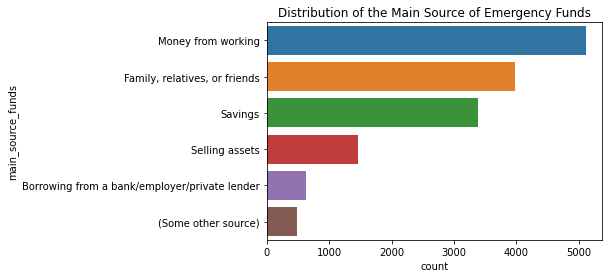

In [ ]:
# barplot of main source of emergency funds
chart = sns.countplot(y = 'main_source_funds', 
                      data = df2, 
                      order = ["Money from working","Family, relatives, or friends",
                               "Savings", "Selling assets",
                               "Borrowing from a bank/employer/private lender", "(Some other source)"]).set(
                      title = "Distribution of the Main Source of Emergency Funds")

The barchart above displays the overall distribution of the main source of emergency funds. Most of the individuals with access to emergency funds recieve their funding from work, their family and friends, or their savings.

[Text(0.5, 1.0, 'Distribution of Recieved Wage Payments')]

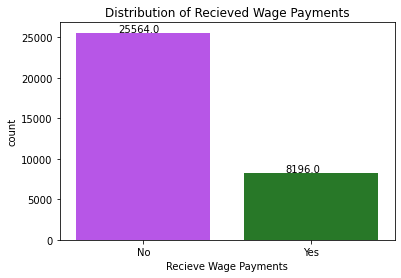

In [ ]:
# barplot of recieved wage payments
chart = sns.countplot(x = 'Recieve Wage Payments',data = df2, order = ["No", "Yes"], palette = yes_no_pal)
for p in chart.patches:
   chart.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+ .25, p.get_height()+100))
chart.set(title = "Distribution of Recieved Wage Payments")

Diving further into the "Money from Working" category, we can see that only 8196 individuals recieve wage payments. This analysis suggests that recieving wage payments may be a key factor in determining access to emergency funds.

In [ ]:
# Visualize
plt.figure(figsize=(10, 10))
sns.barplot(data = df3.sort_values('percent_access'), y = "economy", x = "percent_access").set(title = "Percent of Participants with Access to Emergency Funds by Country")

Broken down by Country, Liberia has the largest percent of individuals with access to emergency funds, while Zambia has the least.

The bar plot below displays the relationship between gender and access to emergency funds. It is clear that males are more likely to have access than females. This points to the idea that there is likely gender inequity with regard to financial status within the Sub-Saharan region.

[Text(0.5, 1.0, 'Distribution of Access by Gender')]

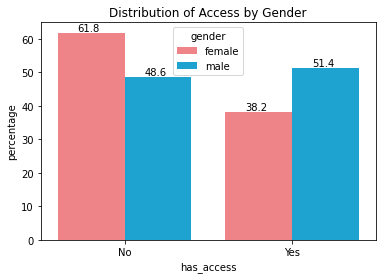

In [ ]:
# barplot of possibility of coming up with emergency funds by gender
# 1 = yes have access, 2 = no, 3 = don't know, 4 = refuse
gender_fin_counts = (df2.groupby(['gender'])['has_access']
                     .value_counts(normalize = True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     )

g = sns.barplot(x = "has_access", y = "percentage", hue="gender", data = gender_fin_counts, palette = [red, blue])
for p in g.patches:
   g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.12, p.get_height()+.5))
g.set(title = "Distribution of Access by Gender")

In [ ]:
#@title
%%capture --no-display
df_gender = df2[['gender', 'economy']].query("gender == 'female'").groupby('economy').count()
df_gender = df_gender.assign(male = lambda df_gender: 1000 - df_gender['gender']).rename(columns = {'gender': 'female'})

#Percent of females
df_gender = df_gender.assign(Female = lambda df_gender: (df_gender['female'])/10)

#Percent of males
df_gender = df_gender.assign(Male = lambda df_gender: 100 - df_gender['Female'])

df_gender = df_gender[['Male', 'Female']]
df_gender['economy'] = df2.economy.unique()
df_gender = df_gender.sort_values('Male')

# Counting by Access to Emergency Funds by gender
f_access = df2[['has_access', 'economy', 'gender']].query("has_access == 'Yes' & gender == 'female'").groupby('economy').count()
m_access = df2[['has_access', 'economy', 'gender']].query("has_access == 'Yes'& gender != 'female'").groupby('economy').count()

# Defining acccess vs no access by country columms
f_count = f_access['has_access']
m_count = m_access['has_access']

# Merging columns
df3 = pd.merge(f_count, m_count, how='inner', on = 'economy')
df3 = df3.assign(total = lambda df3: df3['has_access_x']+df3['has_access_y'])

#Percent of females with access
df3 = df3.assign(f_percent_access = lambda df3: (df3['has_access_x']/df3["total"])*100)

#Percent of males with access
df3 = df3.assign(m_percent_access = 100 - df3['f_percent_access'])

df3['economy'] = df2.economy.unique()
df3 = df3[['m_percent_access', 'f_percent_access',   'economy']]
df3 = df3.sort_values('m_percent_access')
df3 = df3.rename(columns = {'m_percent_access':'Males With Acesss', 'f_percent_access': 'Females With Access'})

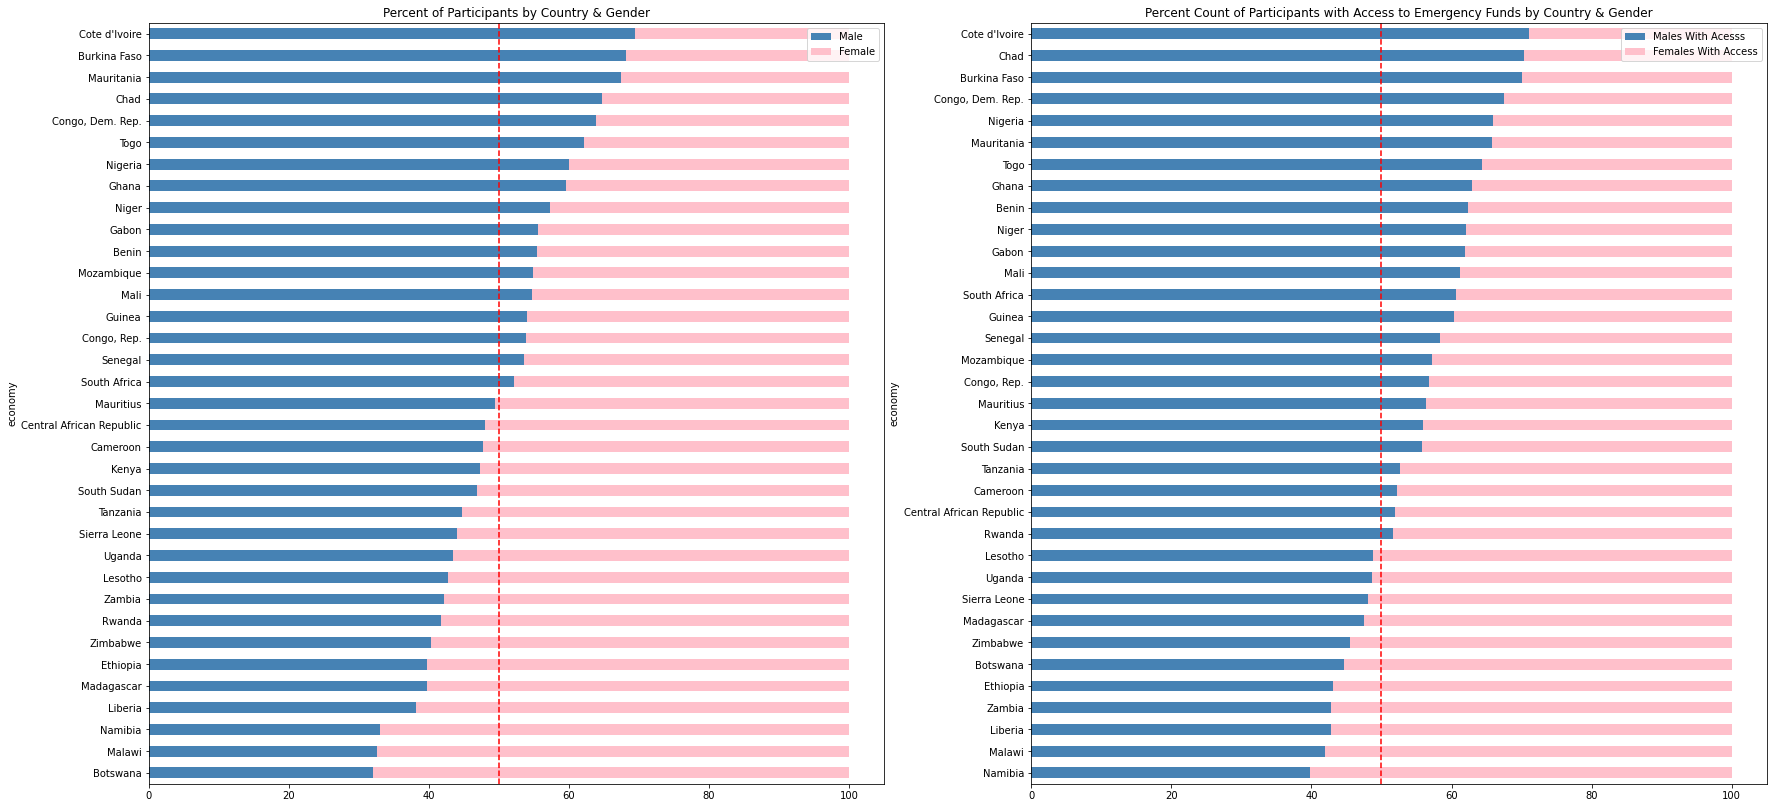

In [ ]:
# create new figure
fig = plt.figure()
#add sub plot
ax1 = fig.add_subplot(1,2,1)
# fig 1
df_gender.set_index('economy').plot(kind='barh', stacked=True, color=['steelblue', 'pink'], title = "Percent of Participants by Country & Gender", ax = ax1).axvline(x = 50, color = "red", linestyle = "dashed")
#add sub plot
ax2 = fig.add_subplot(1,2,2)
# fig 2
fig2 = df3.set_index('economy').plot(kind='barh', stacked=True, color=['steelblue', 'pink'], title = "Percent of Participants with Access to Emergency Funds by Country & Gender", ax = ax2).axvline(x = 50, color = "red", linestyle = "dashed")
# set fig size
fig.set_size_inches(29, 14)

A similar trend emerges by country. Although only about 50% of the countries have a higher percentage of men represented in the questionaire, in 75% of the countries more men that have access to emergency funds than women.

In [ ]:
%%capture --no-display
# Counting by Access to Emergency Funds by country
access = df2[['has_access', 'economy']].query("has_access == 'Yes'").groupby('economy').count()
no_access = df2[['has_access', 'economy']].query("has_access == 'No'").groupby('economy').count()

# Defining acccess vs no access by country columms
a_count = access['has_access']
no_a_count = no_access['has_access']

# Merging columns
df3 = pd.merge(a_count, no_a_count, how='inner', on = 'economy')#.assign(total = lambda df3: df3['has_access_x']+df3['has_access_y'])
#df3 = df3.assign(percent_access = lambda df3: (df3['has_access_x']/df3["total"])*100)

df3['economy'] = df2.economy.unique()
df3 = df3.sort_values('has_access_x')

[Text(0.5, 0, 'Education Level'),
 Text(0.5, 1.0, 'Access to Emergency Funds by Education Level')]

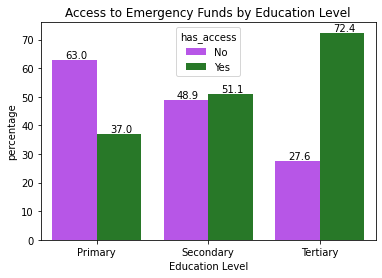

In [ ]:
educ_perc = (df2.groupby(['Education'])['has_access']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     )

educ_access = sns.barplot(x = "Education", y = "percentage", order= ['Primary', 'Secondary', 'Tertiary'], hue="has_access", palette= yes_no_pal, hue_order= ['No', 'Yes'], data = educ_perc)
for p in educ_access.patches:
   educ_access.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.12, p.get_height()+.5))
educ_access.set(title = "Access to Emergency Funds by Education Level", xlabel = 'Education Level')

In the barplot above we can see the distribution of funds based on an individual’s highest education level. 63% of people with only a primary education do not have access to emergency funds compared to 37% of people who do. These numbers are more evenly distributed for those with secondary education, with about 49% of people not having access to emergency funds, while 51% of people do have access. Finally, for those with a tertiary level of education we can see that about 72% of people have access to emergency funds while only 28% of that group does not have access. 
Overall, we can make the assumption that people with a higher level of education are more likely to have access to emergency funds. 
